# Single Column Top 10 Table & Bar Chart
This script can be run on a single column of any dataset. It lists the top 10 values in the column. This is being used instead of a table or pie chart for all the values since displaying multiple 10s of values would not be useful. This script was written for the following columns:
1. Procedures(Procedure_Performed_Description)
2. Medications(Medication_Given_Description)

_Author: Jared Gauntt_

## Prepare for Analysis

### Set Parameters

In [1]:
localFolder='../data/01_raw/' #If run from Git Hub project folder structure, script must be in "notebooks" folder
fileName='20210225-ems-raw-v04.xlsx'
sheetName='Medications'
columnOfInterest='Medication_Given_Description'
removeDuplicates=False

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Import From Excel Spreadsheet

In [3]:
#Import single tab
df=pd.read_excel(localFolder+fileName,sheet_name=sheetName)
print('Original Number of Rows = '+str(len(df)))

Original Number of Rows = 63168


### Remove Duplicate Rows & Reduce To Column Of Interest

In [4]:
if removeDuplicates:
    #Determine which rows are duplicates (True=duplicate, False=first instance of row)
    duplicateRowIdentifier=df.duplicated()

    #Reduce to the rows that were not flagged as duplicates
    df=df.loc[duplicateRowIdentifier==False,:]
    
    print('Removing Duplicate Rows')
    
else:
    print('Duplicate Rows NOT Removed')

#Reduce to column of interest
ds=df[columnOfInterest]

#Confirm
print('Number of Rows = '+str(len(ds)))

Duplicate Rows NOT Removed
Number of Rows = 63168


## Analysis

### Count Number of Instances of Each Unique Value

In [5]:
#Create data frame for counting 
dfCount=pd.DataFrame(ds.unique(),columns=[columnOfInterest])
dfCount['Number of Rows']=0

#Count the number of rows per each value
for index in dfCount.index:
    dfCount.loc[index,'Number of Rows']=len(ds[ds==dfCount.loc[index,columnOfInterest]])
dfCount.sort_values(by='Number of Rows',ascending=False,inplace=True)
dfCount.reset_index(drop=True,inplace=True)

#Calculate the percentage of rows per each value
dfCount['Percent of Rows']=round(dfCount['Number of Rows']/len(ds)*100,2)

### Visualizations

In [6]:
#Prepare data for display
dfTop10=dfCount.iloc[0:10,:]
percentTop10=dfTop10['Percent of Rows'].sum()
dfOthers=dfCount.iloc[10:,]
dfTop10.loc[len(dfTop10)]=['Others',dfOthers['Number of Rows'].sum(),dfOthers['Percent of Rows'].sum()]

D:\00-DevEnv\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [7]:
print('Percent of Rows With Top 10 Values = '+str(percentTop10))
dfTop10

Percent of Rows With Top 10 Values = 85.32


,Medication_Given_Description,Number of Rows,Percent of Rows
0,Oxygen,10726,16.98
1,Normal saline,7584,12.01
2,Ondansetron (Zofran),6893,10.91
3,Fentanyl Citrate (Sublimaze),6616,10.47
4,"Epinephrine 0.1 MG/ML (1:10,000)",6215,9.84
5,"Acetylsalicylic Acid (Aspirin, ASA)",4380,6.93
6,Albuterol (Ventolin),3854,6.10
7,Ipratropium Bromide(Atrovent),2827,4.48
8,Nitroglycerin,2733,4.33
9,Naloxone (Narcan),2068,3.27


In [8]:
#Sort to display top value on top
dfTop10.index=sorted(list(dfTop10.index),reverse=True)
dfTop10.sort_index(inplace=True)

<ipython-input-8-c714dac04332>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTop10.sort_index(inplace=True)


Bar Chart showing the top 10 most frequent values (with Others as 11th category) in the dataset.

Text(0.5, 1.0, 'Top 10 Medications')

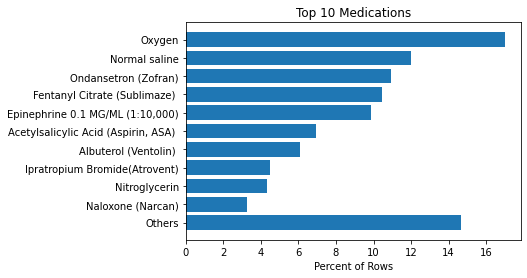

In [9]:
#Bar chart
fig,ax=plt.subplots()
ax.barh(y=dfTop10[columnOfInterest],width=dfTop10['Percent of Rows'])
ax.set_xlabel('Percent of Rows')
ax.set_title('Top 10 '+sheetName)